### Testing 3D data type 



### First test a steady case - 5 deg AoA

In [1]:
include("../src/UNSflow.jl")
    

UNSflow

In [2]:
using UNSflow

### Run a 2D case first

In [3]:
alphadef = ConstDef(5.*pi/180)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kinemdef = KinemDef(alphadef, hdef, udef) 
pvt = 0.0 #leading edge
lespcrit = [18.;]
surf = TwoDSurf("FlatPlate", pvt, kinemdef,lespcrit)
curfield = TwoDFlowField()
nsteps = Int(round(10./0.015))
mat2d, surf2d, curfield2d = lautat(surf, curfield, nsteps)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in slice(::Array{Float64,2}, ::Vararg{Any,N}) at ./deprecated.jl:30
 in sumabs2j at /Users/kramesh/.julia/v0.5/NLsolve/src/utils.jl:1 [inlined]
 in trust_region_(::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Float64, ::Bool) at /Users/kramesh/.julia/v0.5/NLsolve/src/trust_region.jl:105
 in #nlsolve#17(::Symbol, ::Float64, ::Float64, ::Int64, ::Bool, ::Bool, ::Bool, ::Function, ::Float64, ::Bool, ::NLsolve.#nlsolve, ::NLsolve.DifferentiableMultivariateFunction, ::Array{Float64,1}) at /Users/kramesh/.julia/v0.5/NLsolve/src/nlsolve_func_defs.jl:24
 in lautat(::UNSflow.TwoDSurf, ::UNSflow.TwoDFlowField, ::Int64, ::Float64, ::UNSflow.DelVortDef, ::Array{Float64,2}, ::Float64) at /Users/kramesh/Documents/Workspace/UNSflow/src/solvers.jl:30
 in lautat(::UNSflow.TwoDSurf, ::UNSflow.TwoDFlowField, ::Int64) at /Users/kramesh/Documents/Workspace/UNSflow/src/solvers.j

(
[0.015 0.0872665 … 0.836499 -4.48477; 0.03 0.0872665 … 0.0140932 -0.0898808; … ; 9.99 0.0872665 … 0.00277278 -0.128238; 10.005 0.0872665 … 0.0027687 -0.128251],

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.ConstDef(0.08726646259971647),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.08726646259971647,0.0,0.0,0.0,1.0,0.0),[-11.005,-11.0045,-11.0029,-11.0004,-10.9968,-10.9921,-10.9865,-10.9799,-10.9723,-10.9638  …  -10.05,

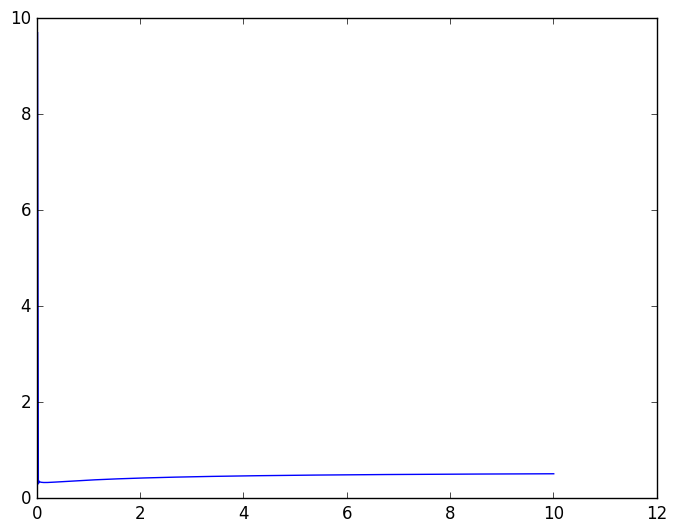

0.5140466862990686

In [4]:
plot(mat2d[:,1],mat2d[:,6])
mat2d[end,6]

In [5]:
# Theoretical value (2*pi*alpha) = 0.5483
# 2D value = 0.5142
# Error = 6% lower

In [6]:
cref = 1.
bref = 10.
sref = 10.

patch1 = patch(0., -5., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch2 = patch(0., 0., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch3 = patch(0., 5., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patchdata = [patch1; patch2; patch3]

alphadef = ConstDef(5.*pi/180)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kin = KinemDef3D(alphadef, hdef, udef)





UNSflow.KinemDef3D(UNSflow.ConstDef(0.08726646259971647),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),"Constant",0,[0.0])

In [7]:
surf = ThreeDSurf(cref, bref, sref, patchdata, kin, 1., 70, 35, 21)
field = ThreeDFlowField()
dtstar = 0.015
nsteps =round(Int,10./dtstar) + 1
mat3d, surf3d, field3d = QSLLT_lautat(surf, field, nsteps, dtstar)


(
[0.015 9.2103 0.794519 -4.25775; 0.03 0.276946 0.0128066 -0.0804236; … ; 10.005 0.416354 0.00777277 -0.103943; 10.02 0.416387 0.00777106 -0.103951],

UNSflow.TwoDSurf[UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.ConstDef(0.0872665),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.0872665,0.0,0.0,0.0,1.0,0.0),[-11.02,-11.0195,-11.0179,-11.0154,-11.0118,-11.0071,-11.0015,-10.9949,-10.9873,-10.9788  …  -10.065,-10.0565,-10.04

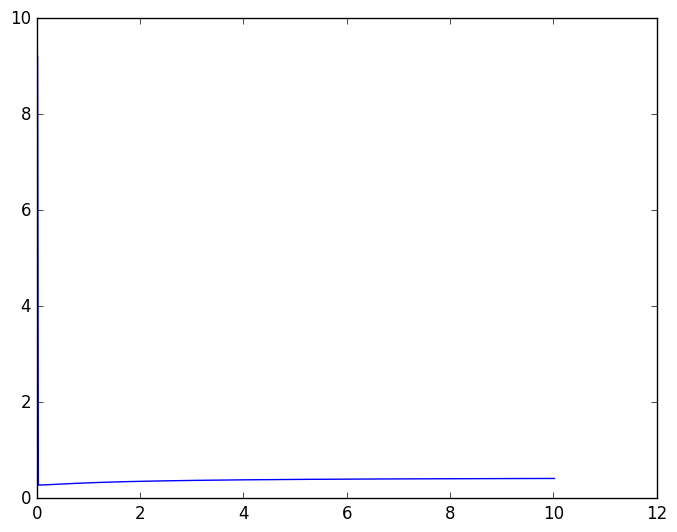

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320478790>

In [8]:
plot(mat3d[:,1],mat3d[:,2])

In [9]:
# Theoretical value = 0.4569
# 3D value from QSLLT = 0.4164
# 8% error lower


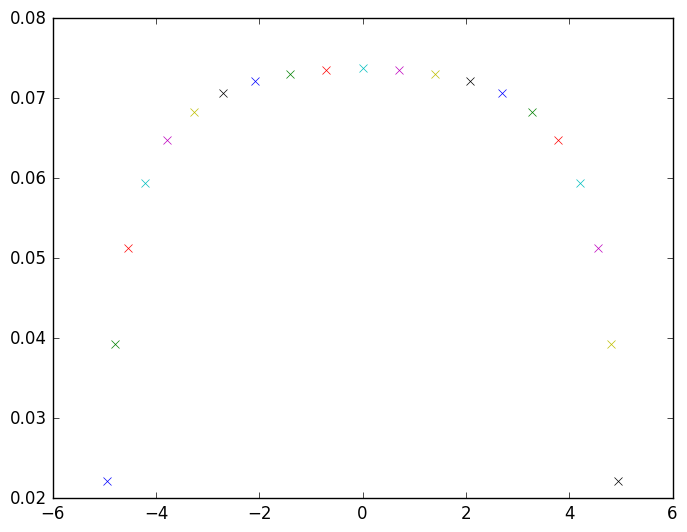

In [10]:
for i = 1:surf.nspan
    plot(surf.yle[i], surf3d[i].a0[1], "x")
end

In [11]:
### Now try the pitch ramp case


In [12]:
alphadef = EldUpDef(45.*pi/180, pi/8, 0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kinemdef = KinemDef(alphadef, hdef, udef) 
pvt = 0.0 #leading edge
lespcrit = [18.;]
surf = TwoDSurf("FlatPlate", pvt, kinemdef,lespcrit)

curfield = TwoDFlowField()
dtstar = 0.0075
nsteps = Int(round(2.5/0.0075))
mat2d, surf2d, curfield2d = lautat(surf, curfield, nsteps, dtstar)

(
[0.0075 7.36966e-13 … -2.17179e-10 0.003155; 0.015 8.86735e-13 … -2.17176e-10 2.64271e-5; … ; 2.49 0.785398 … 0.226434 -0.6806; 2.4975 0.785398 … 0.226592 -0.681529],

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.7853981633974483,0.39269908169872414,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.7853980148910488,0.0,3.664239987121668e-6,0.0,1.0,0.0),[-3.4975,-3.49713,-3.49604,-3.49421,-3.49165,-3.48838,-3

In [13]:
cref = 1.
bref = 10.
sref = 10.

patch1 = patch(0., -5., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch2 = patch(0., 0., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch3 = patch(0., 5., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patchdata = [patch1; patch2; patch3]

alphadef = EldUpDef(45.*pi/180, pi/8, 0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kin = KinemDef3D(alphadef, hdef, udef)






UNSflow.KinemDef3D(UNSflow.EldUpDef(0.7853981633974483,0.39269908169872414,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0),"Constant",0,[0.0])

In [14]:
surf = ThreeDSurf(cref, bref, sref, patchdata, kin, 1., 70, 35, 21)
field = ThreeDFlowField()
dtstar = 0.0075
nsteps =round(Int,2.5/dtstar) + 1
mat3d, surf3d, field3d = QSLLT_lautat(surf, field, nsteps, dtstar)



(
[0.0075 2.08131e-9 1.49594e-21 -1.1828e-9; 0.015 4.63156e-10 3.54443e-22 -2.47191e-10; … ; 2.4975 3.01292 0.6566 -0.664084; 2.505 3.01253 0.655361 -0.663858],

UNSflow.TwoDSurf[UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.785398,0.392699,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.785398,0.0,3.0452e-6,0.0,1.0,0.0),[-3.505,-3.50463,-3.50354,-3.50171,-3.49915,-3.49588,-3.49189,-3.48719,-3.4818,-3.47573  

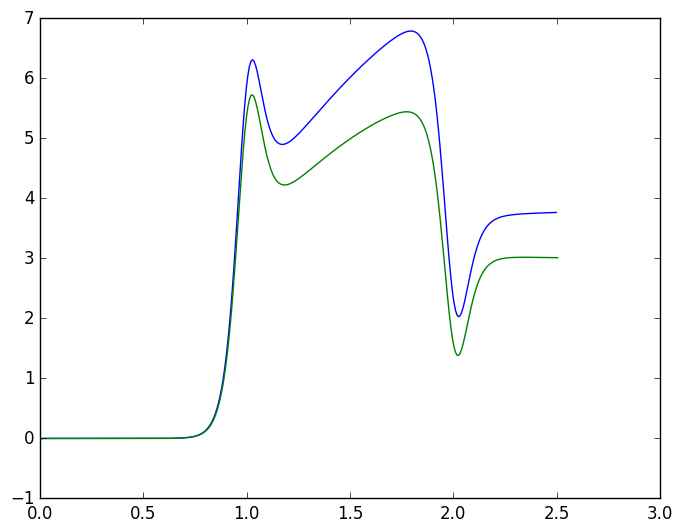

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325188490>

In [15]:
plot(mat2d[:,1],mat2d[:,6])
plot(mat3d[:,1], mat3d[:,2])

In [16]:
matAR103d = mat3d
surfAR103d = surf3d
fieldAR103d = field3d

21-element Array{UNSflow.TwoDFlowField,1}:
 UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[UNSflow.TwoDVort(-0.0163235,0.0553039,-4.0602e-12,0.02,-0.0150248,0.0486033),UNSflow.TwoDVort(-0.0240091,0.0558087,-6.49352e-13,0.02,-0.01524,0.0489815),UNSflow.TwoDVort(-0.0316986,0.0563209,-9.67518e-13,0.02,-0.0154596,0.0493642),UNSflow.TwoDVort(-0.0393923,0.0568405,-1.35406e-12,0.02,-0.0156839,0.0497515),UNSflow.TwoDVort(-0.0470901,0.0573676,-1.70234e-12,0.02,-0.0159129,0.0501435),UNSflow.TwoDVort(-0.0547923,0.0579026,-1.96582e-12,0.02,-0.0161468,0.0505402),UNSflow.TwoDVort(-0.0624989,0.0584454,-2.33402e-12,0.02,-0.0163857,0.0509417),UNSflow.TwoDVort(-0.0702101,0.0589963,-2.74921e-12,0.02,-0.0166298,0.0513481),UNSflow.TwoDVort(-0.0779259,0.0595554,-3.34223e-12,0.02,-0.0168792,0.0517594),UNSflow.TwoDVort(-0.0856467,0.060123,-4.07163e-12,0.02,-0.0171341,0.0521758)  …  UNSflow.TwoDVort(-2.73274,-0.716174,0.000453706,0.02,-0.0611157,-0.112575),UNSflo

In [17]:
cref = 1.
bref = 6.
sref = 6.

patch1 = patch(0., -3., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch2 = patch(0., 0., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch3 = patch(0., 3., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patchdata = [patch1; patch2; patch3]

alphadef = EldUpDef(45.*pi/180, pi/8, 0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kin = KinemDef3D(alphadef, hdef, udef)


surf = ThreeDSurf(cref, bref, sref, patchdata, kin, 1., 70, 35, 21)
field = ThreeDFlowField()
dtstar = 0.0075
nsteps =round(Int,2.5/dtstar) + 1
mat3d, surf3d, field3d = QSLLT_lautat(surf, field, nsteps, dtstar)







(
[0.0075 2.00657e-9 1.44508e-21 -1.1483e-9; 0.015 4.49926e-10 3.48679e-22 -2.41106e-10; … ; 2.4975 2.64829 0.675936 -0.598714; 2.505 2.64781 0.674752 -0.598494],

UNSflow.TwoDSurf[UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.785398,0.392699,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.785398,0.0,3.0452e-6,0.0,1.0,0.0),[-3.505,-3.50463,-3.50354,-3.50171,-3.49915,-3.49588,-3.49189,-3.48719,-3.4818,-3.47573

In [18]:
matAR63d = mat3d
surfAR63d = surf3d
fieldAR63d = field3d

21-element Array{UNSflow.TwoDFlowField,1}:
 UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[UNSflow.TwoDVort(-0.0123134,0.0437135,-3.32489e-12,0.02,-0.0105975,0.0394567),UNSflow.TwoDVort(-0.0199441,0.0441203,-5.83495e-13,0.02,-0.0107508,0.0397729),UNSflow.TwoDVort(-0.0275776,0.0445332,-8.68505e-13,0.02,-0.0109074,0.040093),UNSflow.TwoDVort(-0.035214,0.0449522,-1.06495e-12,0.02,-0.0110672,0.0404172),UNSflow.TwoDVort(-0.0428534,0.0453775,-1.40662e-12,0.02,-0.0112305,0.0407455),UNSflow.TwoDVort(-0.0504959,0.0458092,-1.5505e-12,0.02,-0.0113972,0.0410779),UNSflow.TwoDVort(-0.0581416,0.0462474,-1.97357e-12,0.02,-0.0115676,0.0414147),UNSflow.TwoDVort(-0.0657905,0.0466923,-2.34048e-12,0.02,-0.0117416,0.0417557),UNSflow.TwoDVort(-0.0734427,0.0471441,-2.73161e-12,0.02,-0.0119194,0.0421011),UNSflow.TwoDVort(-0.0810984,0.0476028,-3.3252e-12,0.02,-0.0121012,0.042451)  …  UNSflow.TwoDVort(-2.73147,-0.713952,0.000350799,0.02,-0.048351,-0.0849601),UNSflow

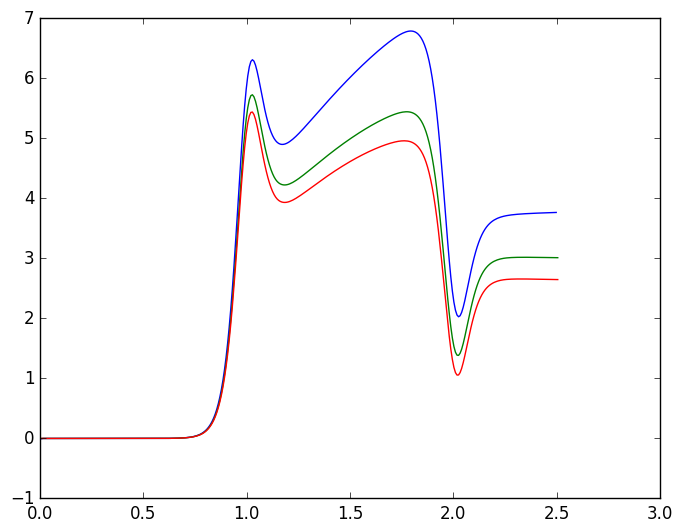

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3253b43d0>

In [19]:
plot(mat2d[:,1],mat2d[:,6])
plot(matAR103d[:,1], matAR103d[:,2])
plot(matAR63d[:,1], matAR63d[:,2])

In [20]:
cref = 1.
bref = 4.
sref = 4.

patch1 = patch(0., -2., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch2 = patch(0., 0., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch3 = patch(0., 2., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patchdata = [patch1; patch2; patch3]

alphadef = EldUpDef(45.*pi/180, pi/8, 0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kin = KinemDef3D(alphadef, hdef, udef)


surf = ThreeDSurf(cref, bref, sref, patchdata, kin, 1., 70, 35, 21)
field = ThreeDFlowField()
dtstar = 0.0075
nsteps =round(Int,2.5/dtstar) + 1
mat3d, surf3d, field3d = QSLLT_lautat(surf, field, nsteps, dtstar)








(
[0.0075 1.91616e-9 1.38303e-21 -1.10513e-9; 0.015 4.40885e-10 3.46902e-22 -2.38211e-10; … ; 2.4975 2.29554 0.683203 -0.533878; 2.505 2.295 0.682054 -0.533662],

UNSflow.TwoDSurf[UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.785398,0.392699,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.785398,0.0,3.0452e-6,0.0,1.0,0.0),[-3.505,-3.50463,-3.50354,-3.50171,-3.49915,-3.49588,-3.49189,-3.48719,-3.4818,-3.47573 

In [21]:
matAR43d = mat3d
surfAR43d = surf3d
fieldAR43d = field3d

21-element Array{UNSflow.TwoDFlowField,1}:
 UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[UNSflow.TwoDVort(-0.00981221,0.0355341,-2.92845e-12,0.02,-0.00791326,0.0329164),UNSflow.TwoDVort(-0.0174086,0.0358701,-3.47933e-13,0.02,-0.00802865,0.0331855),UNSflow.TwoDVort(-0.0250072,0.036211,-7.68934e-13,0.02,-0.00814645,0.033458),UNSflow.TwoDVort(-0.0326079,0.0365572,-9.92215e-13,0.02,-0.00826673,0.033734),UNSflow.TwoDVort(-0.0402108,0.0369086,-1.15073e-12,0.02,-0.00838957,0.0340137),UNSflow.TwoDVort(-0.047816,0.0372654,-1.33935e-12,0.02,-0.00851503,0.0342971),UNSflow.TwoDVort(-0.0554236,0.0376278,-1.6538e-12,0.02,-0.0086432,0.0345841),UNSflow.TwoDVort(-0.0630336,0.0379957,-1.90941e-12,0.02,-0.00877414,0.0348751),UNSflow.TwoDVort(-0.0706461,0.0383695,-2.35869e-12,0.02,-0.00890795,0.0351699),UNSflow.TwoDVort(-0.0782612,0.0387491,-2.83387e-12,0.02,-0.0090447,0.0354686)  …  UNSflow.TwoDVort(-2.73059,-0.712483,0.000286687,0.02,-0.0394795,-0.066751

In [22]:
cref = 1.
bref = 2.
sref = 2.

patch1 = patch(0., -1., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch2 = patch(0., 0., 0., 0., "FlatPlate", 1., 0., 0.11, 10)
patch3 = patch(0., 1., 0., 0., "FlatPlate", 1., 0., 0.11, 5)
patchdata = [patch1; patch2; patch3]

alphadef = EldUpDef(45.*pi/180, pi/8, 0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
kin = KinemDef3D(alphadef, hdef, udef)


surf = ThreeDSurf(cref, bref, sref, patchdata, kin, 1., 70, 35, 21)
field = ThreeDFlowField()
dtstar = 0.0075
nsteps =round(Int,2.5/dtstar) + 1
mat3d, surf3d, field3d = QSLLT_lautat(surf, field, nsteps, dtstar)









(
[0.0075 1.70287e-9 1.23532e-21 -1.00685e-9; 0.015 4.03078e-10 3.27061e-22 -2.20751e-10; … ; 2.4975 1.61759 0.65396 -0.403586; 2.505 1.61702 0.652834 -0.403363],

UNSflow.TwoDSurf[UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.785398,0.392699,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.785398,0.0,3.0452e-6,0.0,1.0,0.0),[-3.505,-3.50463,-3.50354,-3.50171,-3.49915,-3.49588,-3.49189,-3.48719,-3.4818,-3.47573

In [23]:
matAR23d = mat3d
surfAR23d = surf3d
fieldAR23d = field3d

21-element Array{UNSflow.TwoDFlowField,1}:
 UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[UNSflow.TwoDVort(-0.00662431,0.0236883,-2.08944e-12,0.02,-0.00461658,0.0233185),UNSflow.TwoDVort(-0.0141773,0.0239193,-3.27596e-13,0.02,-0.00468516,0.0235149),UNSflow.TwoDVort(-0.0217315,0.0241538,-5.41333e-13,0.02,-0.00475517,0.0237139),UNSflow.TwoDVort(-0.029287,0.0243921,-6.71067e-13,0.02,-0.00482666,0.0239156),UNSflow.TwoDVort(-0.0368438,0.024634,-9.06535e-13,0.02,-0.00489965,0.0241201),UNSflow.TwoDVort(-0.0444018,0.0248798,-9.7896e-13,0.02,-0.00497421,0.0243274),UNSflow.TwoDVort(-0.0519613,0.0251296,-1.22592e-12,0.02,-0.00505036,0.0245376),UNSflow.TwoDVort(-0.0595221,0.0253833,-1.39139e-12,0.02,-0.00512816,0.0247507),UNSflow.TwoDVort(-0.0670844,0.0256412,-1.68572e-12,0.02,-0.00520765,0.0249668),UNSflow.TwoDVort(-0.0746481,0.0259033,-2.07668e-12,0.02,-0.00528889,0.0251859)  …  UNSflow.TwoDVort(-2.72932,-0.710446,0.000201269,0.02,-0.0266345,-0.04

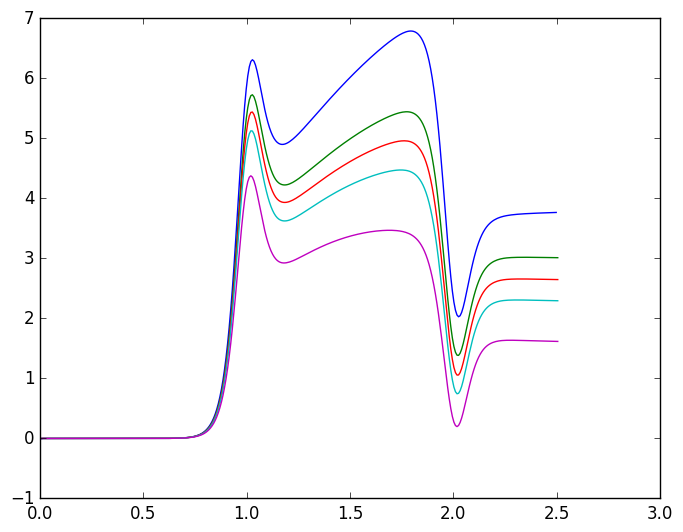

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3255ea0d0>

In [24]:
plot(mat2d[:,1],mat2d[:,6])
plot(matAR103d[:,1], matAR103d[:,2])
plot(matAR63d[:,1], matAR63d[:,2])
plot(matAR43d[:,1], matAR43d[:,2])
plot(matAR23d[:,1], matAR23d[:,2])


In [25]:
k2d = readcsv("PR_2D.csv")
kar4 = readcsv("PR_AR4.csv")
kar2 =  readcsv("PR_AR2.csv")

67×2 Array{Float64,2}:
 -0.125097   0.259303
 -0.10681    0.519016
 -0.0922476  0.908945
 -0.0813684  1.31756 
 -0.0742067  1.83781 
 -0.0596647  2.2835  
 -0.0561932  2.84103 
 -0.0490315  3.36127 
 -0.0308813  3.99274 
 -0.0346808  4.32741 
 -0.0201798  4.88463 
 -0.0203301  5.29356 
 -0.0056651  5.40467 
  ⋮                  
  1.11695    1.87895 
  1.16472    1.97055 
  1.24191    2.00558 
  1.31175    2.02222 
  1.37793    2.02037 
  1.4625     1.99943 
  1.54706    1.99707 
  1.63897    1.99451 
  1.71984    2.02943 
  1.78602    2.02758 
  1.87426    2.00653 
  1.97718    2.05943 

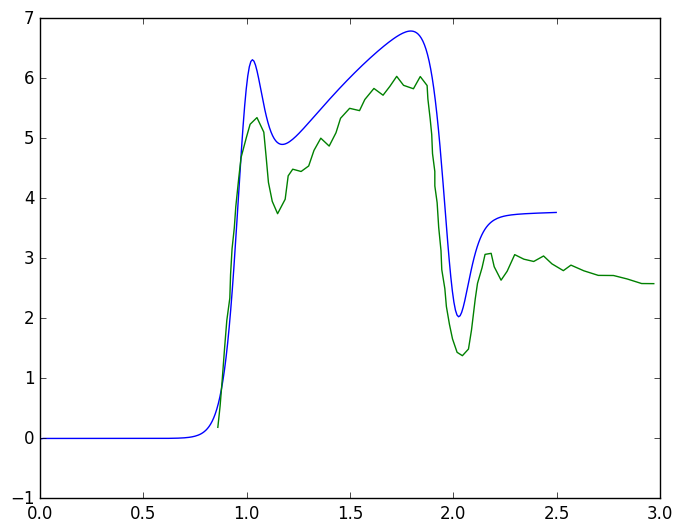

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325827b90>

In [26]:
plot(mat2d[:,1],mat2d[:,6])
plot(k2d[:,1]+1., k2d[:,2])

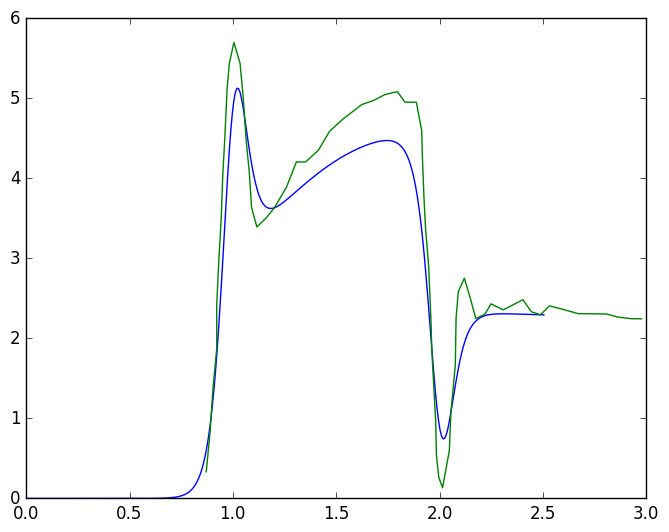

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325a555d0>

In [27]:
plot(matAR43d[:,1], matAR43d[:,2])
plot(kar4[:,1]+1., kar4[:,2])

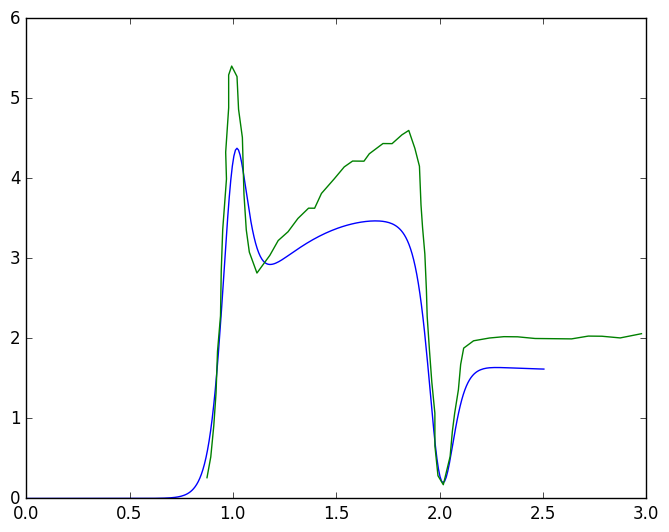

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x325c70050>

In [28]:
plot(matAR23d[:,1], matAR23d[:,2])
plot(kar2[:,1]+1., kar2[:,2])

### Try to parallelise the code